In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Mental health and music analysis

#### For my first question we are going to see what the average age and average hours listened to is as long as what platform is the most used

Average age: 25.206802721088437
Average hours per day: 3.5727581521739133
Most used streaming service: Spotify
Most hours spent on music: 24.0


<Axes: xlabel='Primary streaming service', ylabel='Number of Respondents'>

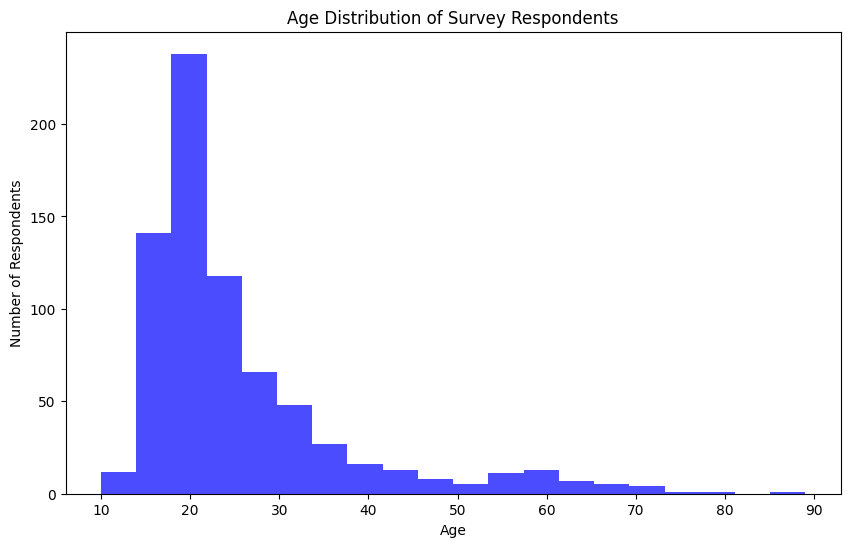

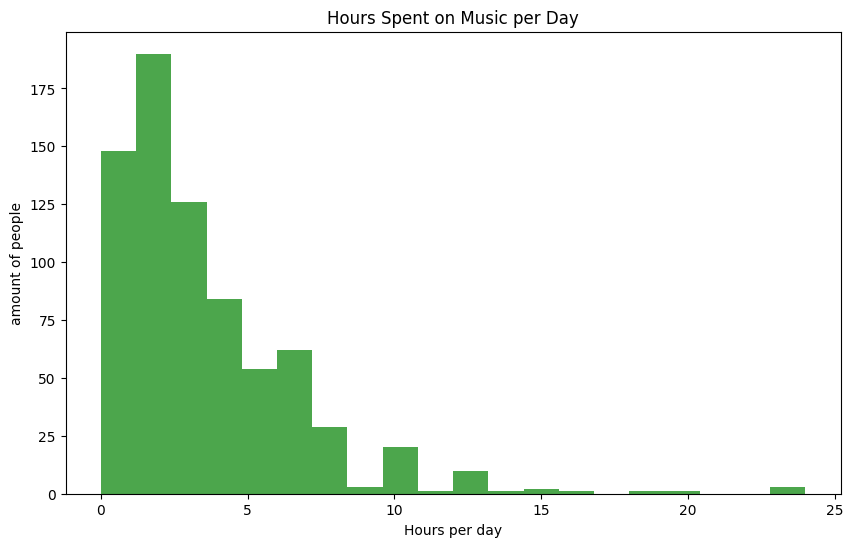

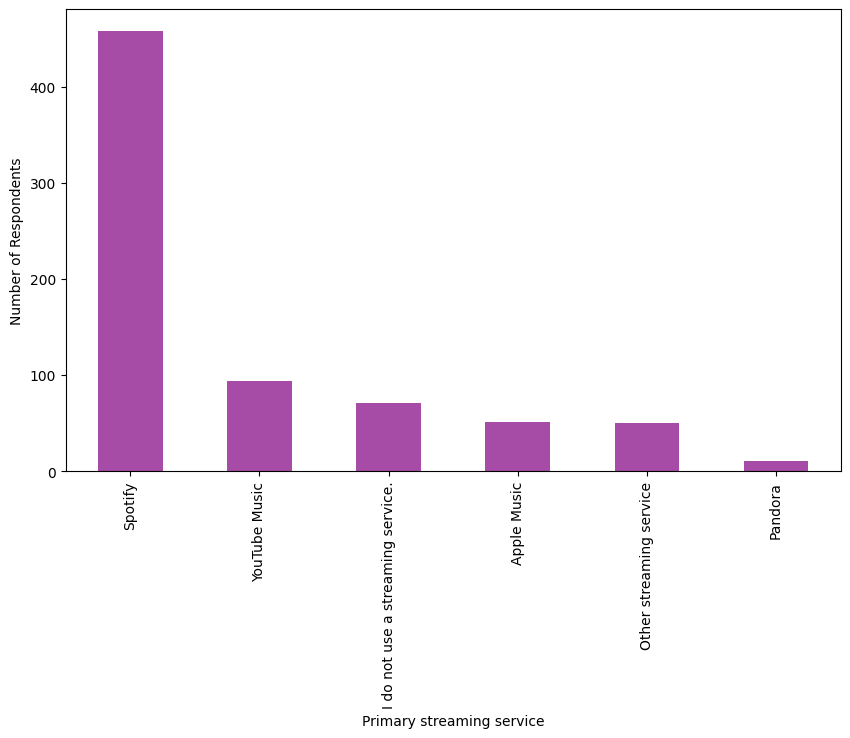

In [17]:
# Load the dataset
survey = pd.read_csv('mxmh_survey_results.csv')
# get the releveant data from the survey
avg_age = survey['Age'].mean()
avg_hours = survey['Hours per day'].mean()
most_used_streaming_service = survey['Primary streaming service'].mode()[0]
most_hours = survey['Hours per day'].max()
print(f'Average age: {avg_age}')
print(f'Average hours per day: {avg_hours}')
print(f'Most used streaming service: {most_used_streaming_service}')
print(f'Most hours spent on music: {most_hours}')
# Create a histogram of the age distribution
plt.figure(figsize=(10, 6))
plt.hist(survey['Age'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.title('Age Distribution of Survey Respondents')
#create a histogram of the hours spent on music per day
plt.figure(figsize=(10, 6))
plt.hist(survey['Hours per day'], bins=20, color='green', alpha=0.7)
plt.xlabel('Hours per day')
plt.ylabel('amount of people')
plt.title('Hours Spent on Music per Day')
# Create a bar chart of the most used streaming services
streaming_service_counts = survey['Primary streaming service'].value_counts()
plt.figure(figsize=(10, 6))
plt.ylabel('Number of Respondents')
streaming_service_counts.plot(kind='bar', color='purple', alpha=0.7)




## question ananlysis 
We can use that the average age of people in this survey is around 25 years of age and people in their 20's are the most commmon in this survey. They also stream music for around 3.5 hours a day using spotify. This give us an indicator on how much time people usually spend listening to music throughout the day. We can also see that the max amount of time spent listening was a a full day! Often times when people listen to music for this long it is to combat something in the outside world.

### Q2 
What mental illnessess are present with the people in the survey and the hours they spend listening to music. As well as how many of them see an improvment listening to music?

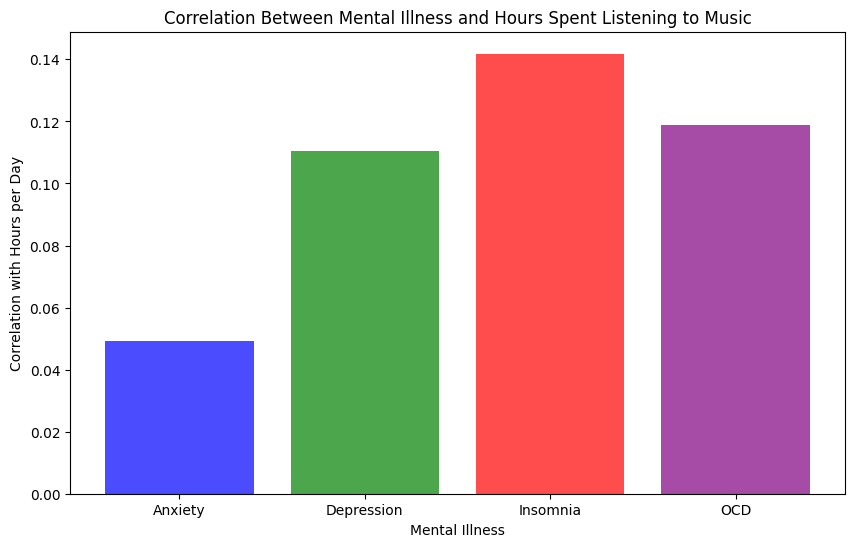

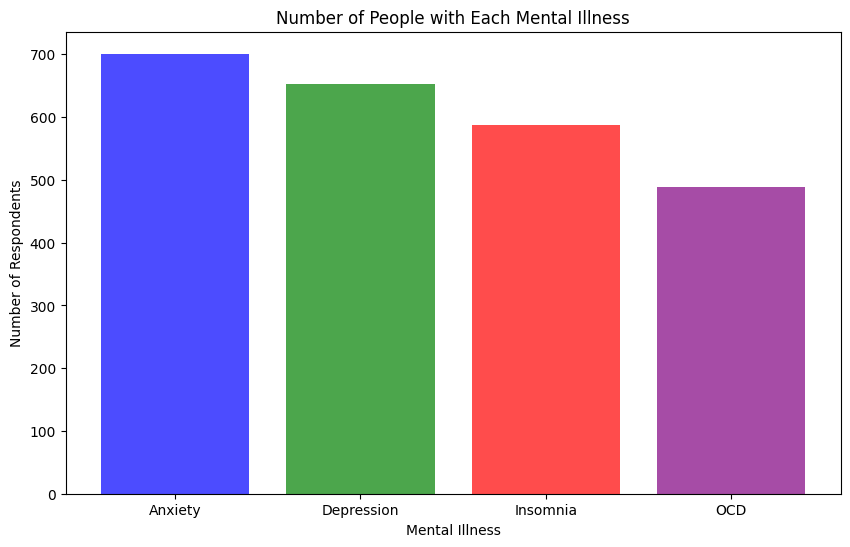

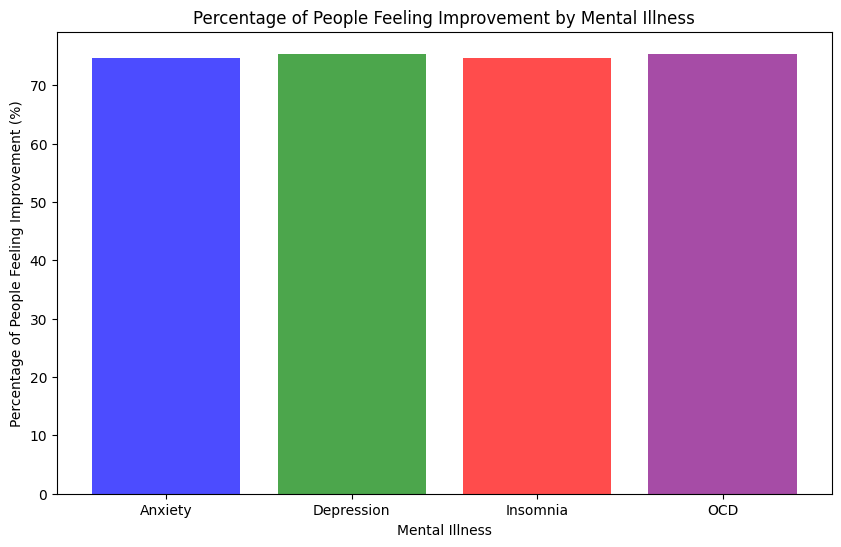

In [32]:
# Check what the coorelation between people with anxeity, depression, insomina and ocd and how strong they feel it to the hours spent on music.
anxiety_hours = survey[survey['Anxiety'] == 'Yes']['Hours per day']
depression_hours = survey[survey['Depression'] == 'Yes']['Hours per day']               
# Calculate correlations
anxiety_hours_corr = survey['Anxiety'].corr(survey['Hours per day'])
depression_hours_corr = survey['Depression'].corr(survey['Hours per day'])
insomnia_hours_corr = survey['Insomnia'].corr(survey['Hours per day'])
ocd_hours_corr = survey['OCD'].corr(survey['Hours per day'])

# Plot the correlations
correlations = {
    'Anxiety': anxiety_hours_corr,
    'Depression': depression_hours_corr,
    'Insomnia': insomnia_hours_corr,
    'OCD': ocd_hours_corr
}

plt.figure(figsize=(10, 6))
plt.bar(correlations.keys(), correlations.values(), color=['blue', 'green', 'red', 'purple'], alpha=0.7)
plt.xlabel('Mental Illness')
plt.ylabel('Correlation with Hours per Day')
plt.title('Correlation Between Mental Illness and Hours Spent Listening to Music')
# Show the plots
plt.show()
# Count the number of people with each mental illness based on a scale of 1-10
mental_illness_counts = {
    'Anxiety': survey[survey['Anxiety'] > 0]['Anxiety'].count(),
    'Depression': survey[survey['Depression'] > 0]['Depression'].count(),
    'Insomnia': survey[survey['Insomnia'] > 0]['Insomnia'].count(),
    'OCD': survey[survey['OCD'] > 0]['OCD'].count()
}

# Create a bar chart of the number of people with each mental illness
plt.figure(figsize=(10, 6))
plt.bar(mental_illness_counts.keys(), mental_illness_counts.values(), color=['blue', 'green', 'red', 'purple'], alpha=0.7)
plt.xlabel('Mental Illness')
plt.ylabel('Number of Respondents')
plt.title('Number of People with Each Mental Illness')
plt.show()

#now count how many see the music effects of improving their mental health
mental_health_effects_counts = {
    'Anxiety': survey[survey['Anxiety'] > 0]['Music effects'].count(),
    'Depression': survey[survey['Depression'] > 0]['Music effects'].count(),
    'Insomnia': survey[survey['Insomnia'] > 0]['Music effects'].count(),
    'OCD': survey[survey['OCD'] > 0]['Music effects'].count()
}
# Create a bar chart of the number of people with each mental illness
# Calculate the percentage of people who feel improvements for each mental illness
improvement_percentages = {
    'Anxiety': (survey[survey['Anxiety'] > 0]['Music effects'].str.contains('Improve', na=False).sum() / mental_illness_counts['Anxiety']) * 100,
    'Depression': (survey[survey['Depression'] > 0]['Music effects'].str.contains('Improve', na=False).sum() / mental_illness_counts['Depression']) * 100,
    'Insomnia': (survey[survey['Insomnia'] > 0]['Music effects'].str.contains('Improve', na=False).sum() / mental_illness_counts['Insomnia']) * 100,
    'OCD': (survey[survey['OCD'] > 0]['Music effects'].str.contains('Improve', na=False).sum() / mental_illness_counts['OCD']) * 100
}

# Plot the improvement percentages
plt.figure(figsize=(10, 6))
plt.bar(improvement_percentages.keys(), improvement_percentages.values(), color=['blue', 'green', 'red', 'purple'], alpha=0.7)
plt.xlabel('Mental Illness')
plt.ylabel('Percentage of People Feeling Improvement (%)')
plt.title('Percentage of People Feeling Improvement by Mental Illness')
plt.show()






## Question analysis 
Here we can see that people with insomnia tend to listen to the most music at around 0.14 hours a day between all people with it. However, people with anxeity are the opposite as they listen to the least amount of music on average compared to the other grouos at only 0.05 hours a day. Despite the disparity we see that improvement is very common when listening to music at around 70% per group. 

### Q3
Now we are going to see what the most listened/favorite genre is between all people and what generes corralate with what mental illness.

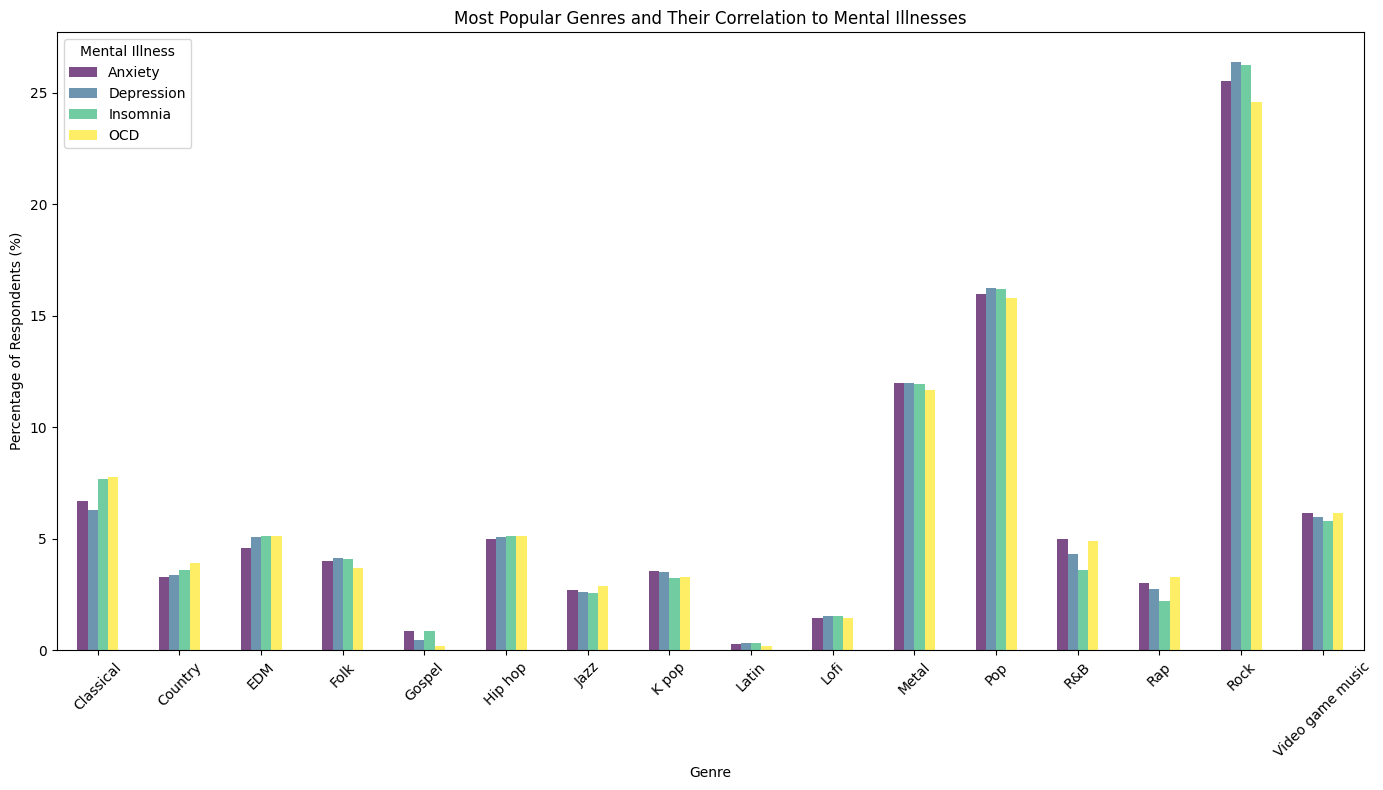

In [ ]:
# Combine all mental illnesses into one DataFrame for better visualization
mental_illness_genres = pd.DataFrame({
    'Anxiety': anxiety_genre_counts,
    'Depression': depression_genre_counts,
    'Insomnia': insomnia_genre_counts,
    'OCD': ocd_genre_counts
}).fillna(0)

# Normalize the counts to percentages for better comparison
mental_illness_genres_percentage = mental_illness_genres.div(mental_illness_genres.sum(axis=0), axis=1) * 100

# Plot the normalized percentages for each genre across mental illnesses
mental_illness_genres_percentage.plot(kind='bar', figsize=(14, 8), alpha=0.7, colormap='viridis')
plt.xlabel('Genre')
plt.ylabel('Percentage of Respondents (%)')
plt.title('Most Popular Genres and Their Correlation to Mental Illnesses')
plt.xticks(rotation=45)
plt.legend(title='Mental Illness')
plt.tight_layout()
plt.show()



## Q3 analysis
Here we can see that the most listened to genre among all groups is Rock followed by pop then metal 